For this project, I will be using classification methods on the Iris dataset and see which method is the best fit. The following classificaiton methods will be used:
- Logistic Regression
- Support Vector Machines
- K-Nearest Neighbor
- Random Forest Classifier
- XGB Classifier
- Neural Networks using Keras

In addition to analyzing these methods, I will also provide a classification report and log the accuracy scores of each methods into a dictionary. For the neural network, I will also add the minumum loss value to it.

To start, let's import our packages:

In [1325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from xgboost import XGBClassifier

from tensorflow import keras
from keras import Sequential
from keras.layers import BatchNormalization, Dense, Dropout
from keras.callbacks import EarlyStopping

#Configure plotting options
sns.set_style('darkgrid')
plt.rc('axes', labelsize=14, labelweight='bold', titlesize=16, titleweight='bold')

## Splitting the data

Next, we have to set up our features and target data, and then split them into training and testing. I decided to use a 30% testing size because of how small the data is.

In [1326]:
iris = sns.load_dataset('iris')
X = iris.iloc[:,:4]
y = iris.species.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}) #This data needs to be encoded to do any classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69)

classification_scores = {}

Our data is split up and the accuracy score dictionary is ready. We can now analyze your findings. I will start with the Tree-Based models which is the Random Forest Classifier and the XGB Classifier, because the other classification models require the data to be scaled.
## Random Forest

In [1327]:
rf = RandomForestClassifier().fit(X_train,y_train)

X_train_preds = rf.predict(X_train)
X_test_preds = rf.predict(X_test)

train_acc = accuracy_score(y_train, X_train_preds)
test_acc = accuracy_score(y_test, X_test_preds)

print('Training Accuracy Score: {:.2f}%'.format(train_acc*100))
print('Testing Accuracy Score: {:.2f}%'.format(test_acc*100))
classification_scores['Random Forest'] = test_acc.round(2)

Training Accuracy Score: 100.00%
Testing Accuracy Score: 97.78%


In [1328]:
print(classification_report(y_test, X_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Our training data for Random Forest came out as 100%, while the testing data came out as 97.78%.

We can also compute the cofusion matrix to determine how many of the actual/predicted values are real.

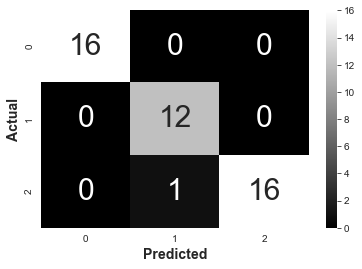

In [1329]:
test_cm = confusion_matrix(y_test, X_test_preds)
sns.heatmap(test_cm, cmap='gray', annot=True, annot_kws={'size': 30})
plt.xlabel('Predicted')
plt.ylabel('Actual');

It turns out that only one value was a false negative.
## XGB Classifier

In [1330]:
clf = XGBClassifier().fit(X_train,y_train)

X_train_preds = clf.predict(X_train)
X_test_preds = clf.predict(X_test)

train_acc = accuracy_score(y_train, X_train_preds)
test_acc = accuracy_score(y_test, X_test_preds)

print('Training Accuracy Score: {:.2f}%'.format(train_acc*100))
print('Testing Accuracy Score: {:.2f}%'.format(test_acc*100))
classification_scores['XGB'] = test_acc.round(2)

[19:25:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy Score: 100.00%
Testing Accuracy Score: 97.78%


C:\Users\Kwasie Agbemadon\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Our training and testing scores are the same as the Random Forest Classifier.

In [1331]:
print(classification_report(y_test, X_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Now that we classified the data using tree-based models, we can now scale the data for the other models.

In [1332]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Logistic Regression

In [1333]:
clf = LogisticRegression().fit(X_train,y_train)
X_train_preds = clf.predict(X_train)
X_test_preds = clf.predict(X_test)

In [1334]:
train_acc = accuracy_score(y_train, X_train_preds)
test_acc = accuracy_score(y_test, X_test_preds)
print('Training Accuracy Score: {:.2f}%'.format(train_acc*100))
print('Testing Accuracy Score: {:.2f}%'.format(test_acc*100))
classification_scores['Logistic'] = test_acc.round(2)

Training Accuracy Score: 95.24%
Testing Accuracy Score: 93.33%


In [1335]:
print(classification_report(y_test, X_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      1.00      0.89        12
           2       1.00      0.82      0.90        17

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



Our training score for Logistic Regression is 95.24%, and the testing score is 93.33%. This is the lowest score so far.

## SVM

In [1336]:
svm = SVC().fit(X_train,y_train)
X_train_preds = svm.predict(X_train)
X_test_preds = svm.predict(X_test)

train_acc = accuracy_score(y_train, X_train_preds)
test_acc = accuracy_score(y_test, X_test_preds)
print('Training Accuracy Score: {:.2f}%'.format(train_acc*100))
print('Testing Accuracy Score: {:.2f}%'.format(test_acc*100))

classification_scores['SVM'] = test_acc.round(2)

Training Accuracy Score: 97.14%
Testing Accuracy Score: 95.56%


In [1337]:
print(classification_report(y_test, X_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Our training score for SVM is 97.14%, and the testing score is 95.56%.

## KNN

For this classification method, we can loop through a range of values and plot them to see which gets the best score:

C:\Users\Kwasie Agbemadon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kwasie Agbemadon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


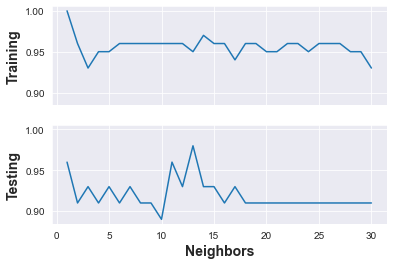

In [1338]:
train_scores = {}
test_scores = {}

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    X_train_preds = knn.predict(X_train)
    X_test_preds = knn.predict(X_test)
    
    #The scores (based on the amount of neighbors) will be logged into the dictionaries
    train_scores[i] = accuracy_score(y_train, X_train_preds).round(2)
    test_scores[i] = accuracy_score(y_test, X_test_preds).round(2)

#Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

sns.lineplot(train_scores.keys(), train_scores.values(), ax=ax1)
sns.lineplot(test_scores.keys(), test_scores.values(), ax=ax2)

ax1.set_ylabel('Training')
ax2.set_ylabel('Testing')
plt.xlabel('Neighbors');

In [1339]:
best_value = max(test_scores, key=test_scores.get)
knn = KNeighborsClassifier(n_neighbors=best_value).fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [1340]:
print('Accuracy score with {} neighbors: {}%'.format(best_value, max(test_scores.values()) * 100))
classification_scores['KNN'] = max(test_scores.values())

Accuracy score with 13 neighbors: 98.0%


## Keras

In [1341]:
nn_model = Sequential([Dense(16, activation='relu', input_shape=[X.shape[1]]),
                     BatchNormalization(),
                     Dropout(.3),
                     Dense(4, activation='relu'),
                     BatchNormalization(),
                     Dropout(.3),
                     Dense(3, activation='softmax')])

#These parameters will be used since we are dealing with multi-class classification
nn_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#This will stop running the model if the accuracy hasn't improved by 0.01 in the past 20 seconds
early_stopping = EarlyStopping(min_delta=1e-2, patience=20, restore_best_weights=True)

#This simply displays the values in each epoch
fit = nn_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                   batch_size=16, epochs=200, callbacks=[early_stopping], verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 23ms/step - loss: 1.1484 - accuracy: 0.4952 - val_loss: 0.9262 - val_accuracy: 0.7556
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 1.2252 - accuracy: 0.4571 - val_loss: 0.9098 - val_accuracy: 0.7778
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1093 - accuracy: 0.5238 - val_loss: 0.8908 - val_accuracy: 0.7778
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 1.1308 - accuracy: 0.4000 - val_loss: 0.8775 - val_accuracy: 0.8000
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 1.0896 - accuracy: 0.5143 - val_loss: 0.8584 - val_accuracy: 0.8000
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.9770 - accuracy: 0.5238 - val_loss: 0.8431 - val_accuracy: 0.8444
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.9513 - accuracy: 0.5048 - val_loss: 0.8180 - val_accuracy: 0.8667
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.4750 - accuracy: 0.8381 - val_loss: 0.2468 - val_accuracy: 0.9333
Epoch 60/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4464 - accuracy: 0.8762 - val_loss: 0.2454 - val_accuracy: 0.9333
Epoch 61/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4257 - accuracy: 0.8286 - val_loss: 0.2451 - val_accuracy: 0.9111
Epoch 62/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4725 - accuracy: 0.8095 - val_loss: 0.2386 - val_accuracy: 0.9111
Epoch 63/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4057 - accuracy: 0.8667 - val_loss: 0.2371 - val_accuracy: 0.9111
Epoch 64/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3816 - accuracy: 0.8762 - val_loss: 0.2282 - val_accuracy: 0.9111
Epoch 65/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.8571 - val_loss: 0.2287 - val_accuracy: 0.9111
Epoch 66/200
7/7 [===============

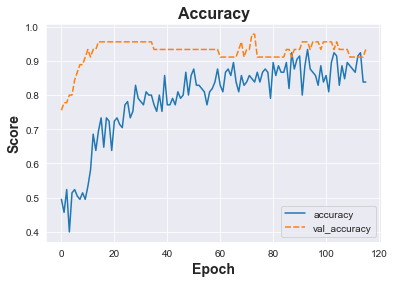

In [1342]:
losses = pd.DataFrame(fit.history)

sns.lineplot(data=losses.loc[:,['accuracy','val_accuracy']]);
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score');

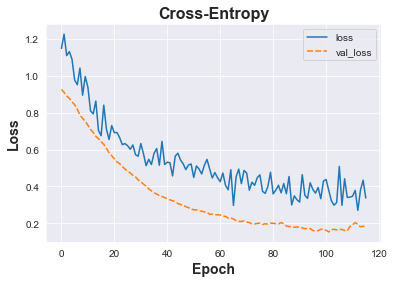

In [1343]:
sns.lineplot(data=losses.loc[:,::2]);
plt.title('Cross-Entropy')
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [1344]:
test_acc = losses.val_accuracy.max()
max_val_loss = losses.val_loss.min()

print('Maximum Accuracy Score: {:.2f}%'.format(test_acc*100))
print('Minimum Validation Loss: {:.2f}'.format(max_val_loss))

classification_scores['Neural Networks'] = round(test_acc,2)

Maximum Accuracy Score: 97.78%
Minimum Validation Loss: 0.15


Our accuracy score for Neural Networks is 97.78%. This is the fourth classification model with this score.

Now that we have finished classifying our data, let's chart the scores together.

In [1345]:
scores = pd.DataFrame({'Score': classification_scores.values()}, index=classification_scores.keys())
scores.sort_values('Score', ascending=False)

,Score
Random Forest,0.98
XGB,0.98
KNN,0.98
Neural Networks,0.98
SVM,0.96
Logistic,0.93


In [1346]:
print('Best classification method(s):')
for s in list(scores.index[scores.Score == scores.Score.max()]):
    print(s)

Best classification method(s):
Random Forest
XGB
KNN
Neural Networks


Random Forest, XGBClassifier, KNN, and Neural Networks are the best classification methods for the Iris dataset. However, this could vary from time to time.